In [ ]:
from google.colab import drive

# Mounting Google Drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
# Listing the files inside the Google Drive directory (Use your own directory)
!ls "/content/drive/MyDrive/Cs464/dataset"

test  train


In [ ]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
img_size = 48 #original size of the image

In [ ]:
def getFaceImages(emotions, data_type, print_n=False):
    images = []
    labels = []
    path = "/content/drive/MyDrive/Cs464/dataset/" + data_type + "/"
    for i,f in enumerate(emotions):
        p = path + f
        j=0
        for image_path in glob.glob(os.path.join(p, "*.jpg")):
            image = cv2.imread(image_path, 0)
            image = cv2.resize(image, (img_size, img_size))
            images.append(image)
            labels.append(i)
            j+=1
        if(print_n):
            print("There are " , j , " " , data_type.upper(), " images of " , emotions[i].upper())
    images = np.array(images)
    labels = np.array(labels)
    return images, labels


# Train, Validation and Test Sets

In [ ]:
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

#Get Images and Labels
X, y =  getFaceImages(emotions, 'train', print_n=True)

# Splitting the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_test, y_test = getFaceImages(emotions, 'test', print_n=True)

There are  3995   TRAIN  images of  ANGRY
There are  436   TRAIN  images of  DISGUST
There are  4097   TRAIN  images of  FEAR
There are  7221   TRAIN  images of  HAPPY
There are  4965   TRAIN  images of  NEUTRAL
There are  4830   TRAIN  images of  SAD
There are  3171   TRAIN  images of  SURPRISE
There are  958   TEST  images of  ANGRY
There are  111   TEST  images of  DISGUST
There are  1024   TEST  images of  FEAR
There are  1774   TEST  images of  HAPPY
There are  1239   TEST  images of  NEUTRAL
There are  1247   TEST  images of  SAD
There are  831   TEST  images of  SURPRISE


# Standard Scaler

In [ ]:
#Scale Data Images
scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X_train])
X_val = scaler.fit_transform([i.flatten() for i in X_val])
X_test = scaler.fit_transform([i.flatten() for i in X_test])

# **Random Forest** without PCA

## n_estimators = 1, 25, 50, 75, 150

In [ ]:
classifier = RandomForestClassifier(n_estimators = 1, random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[161  11 103 179 128 132  64]
 [ 11  15  11  21  10  14  10]
 [119  15 181 172 143 131  74]
 [145  20 178 574 248 215 104]
 [145  13 117 213 213 166  80]
 [133  16 140 215 170 236  75]
 [ 65  12  87  85  77  77 219]]


0.2784259098032387

In [ ]:
classifier = RandomForestClassifier(n_estimators = 25, random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[ 204    0   94  223  118  113   26]
 [   7   24    4   28   13   13    3]
 [  90    0  244  225   97  130   49]
 [ 114    0   79 1017  130  116   28]
 [ 112    0   88  290  331  105   21]
 [ 110    0  106  296  178  266   29]
 [  31    0   74  111   57   35  314]]


0.41790005223750654

In [ ]:
classifier = RandomForestClassifier(n_estimators = 50, random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[ 185    0   60  279  113  122   19]
 [   2   24    8   31   14    9    4]
 [  87    0  221  254   96  127   50]
 [  72    0   61 1113   99  113   26]
 [  66    0   65  322  360  114   20]
 [  87    0   86  305  164  312   31]
 [  26    0   53  112   58   34  339]]


0.4447153055894132

In [ ]:
classifier = RandomForestClassifier(n_estimators = 75, random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[ 182    0   55  264  132  129   16]
 [   2   25    9   30   11   11    4]
 [  74    0  213  266   89  132   61]
 [  60    0   43 1147   94  112   28]
 [  45    0   49  334  375  121   23]
 [  66    0   79  313  155  344   28]
 [  17    0   46  123   51   41  344]]


0.45794880724360093

In [ ]:
classifier = RandomForestClassifier(n_estimators = 150, random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[ 158    0   46  303  114  131   26]
 [   2   24    6   33   13   11    3]
 [  63    0  205  271   89  139   68]
 [  31    0   34 1182   95  115   27]
 [  33    0   45  339  396  107   27]
 [  46    0   56  329  159  363   32]
 [  14    0   45  115   53   41  354]]


0.46700330837541354

## **n_estimators = 50**

In [ ]:
classifier = RandomForestClassifier(n_estimators = 50, bootstrap = False, random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[ 175    0   67  268  123  121   24]
 [   4   24    6   30   14    9    5]
 [  73    0  234  251   97  115   65]
 [  67    0   55 1125  107  110   20]
 [  51    0   54  306  404  111   21]
 [  92    0  109  290  157  315   22]
 [  26    0   53  107   57   38  341]]


0.4558593069824134

In [ ]:
classifier = RandomForestClassifier(n_estimators = 50, bootstrap = False, class_weight = "balanced", random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[ 175    0   78  317   95   92   21]
 [   7   24    3   35   10    9    4]
 [  65    0  238  281   82  115   54]
 [  75    0   49 1129  100  108   23]
 [  61    0   57  362  329  110   28]
 [  64    0   71  373  130  314   33]
 [  24    0   36  134   47   39  342]]


0.4441929305241163

In [ ]:
classifier = RandomForestClassifier(n_estimators = 50, bootstrap = False, min_samples_split = 3, random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[ 178    0   60  268  118  131   23]
 [  13   23    7   24   12   11    2]
 [  64    0  234  264   91  121   61]
 [  61    0   40 1129  101  119   34]
 [  42    0   61  289  398  130   27]
 [  71    0   81  297  174  332   30]
 [  19    0   52  112   50   39  350]]


0.4603865575483197

In [ ]:
classifier = RandomForestClassifier(n_estimators = 50, bootstrap = False, min_samples_split = 4, random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[ 165    0   55  271  133  127   27]
 [   4   23    5   27   14   14    5]
 [  57    0  223  249   95  146   65]
 [  49    0   46 1124  108  126   31]
 [  56    0   47  304  404  109   27]
 [  76    0   78  306  171  321   33]
 [  20    0   47  108   66   40  341]]


0.4528991816123977

In [ ]:
classifier = RandomForestClassifier(n_estimators = 50, bootstrap = False, min_samples_split = 5, random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[ 161    0   57  278  115  136   31]
 [   9   22    5   28   14   12    2]
 [  79    0  226  217  107  142   64]
 [  44    0   45 1138  108  123   26]
 [  47    0   54  292  389  137   28]
 [  68    0   71  289  174  354   29]
 [  21    0   47  118   58   30  348]]


0.4593418074177259

In [ ]:
classifier = RandomForestClassifier(n_estimators = 50, bootstrap = False, min_samples_split = 6, random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[ 175    0   51  279  130  115   28]
 [   4   21    6   31   15    8    7]
 [  62    0  223  244  113  131   62]
 [  52    0   34 1123  119  126   30]
 [  41    0   55  292  386  146   27]
 [  69    0   70  303  163  353   27]
 [  26    0   44  114   42   47  349]]


0.45794880724360093

## **n_estimators = 100**

In [ ]:
classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[ 174    0   52  287  131  115   19]
 [   3   21    8   32   15    9    4]
 [  59    1  210  265   98  137   65]
 [  57    0   44 1109  106  134   34]
 [  36    0   33  330  390  128   30]
 [  51    0   65  318  186  343   22]
 [  18    0   41  123   52   33  355]]


0.45307330663416334

In [ ]:
classifier = RandomForestClassifier(n_estimators = 100, bootstrap = False, random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[ 178    0   51  276  129  126   18]
 [   3   26   13   27   13    8    2]
 [  52    1  225  237  122  139   59]
 [  44    0   49 1141   89  133   28]
 [  39    0   46  309  379  146   28]
 [  59    0   55  316  182  345   28]
 [  19    0   29  114   62   34  364]]


0.46282430785303846

In [ ]:
classifier = RandomForestClassifier(n_estimators = 100, bootstrap = False,n_jobs=-1, random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[ 178    0   51  276  129  126   18]
 [   3   26   13   27   13    8    2]
 [  52    1  225  237  122  139   59]
 [  44    0   49 1141   89  133   28]
 [  39    0   46  309  379  146   28]
 [  59    0   55  316  182  345   28]
 [  19    0   29  114   62   34  364]]


0.46282430785303846

In [ ]:
classifier = RandomForestClassifier(n_estimators = 100, max_depth=10, min_samples_split=2, random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[  69    0   37  415  115  108   34]
 [   0    1    2   62   13   10    4]
 [  17    0  111  385  107  122   93]
 [   9    0   11 1235   71  118   40]
 [  11    0   23  451  303  124   35]
 [  13    0   24  467  159  285   37]
 [   6    0   18  195   43   35  325]]


0.405537175692147

In [ ]:
classifier = RandomForestClassifier(n_estimators = 100, max_depth=20, min_samples_split=3,bootstrap = False, random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[ 171    0   59  273  132  119   24]
 [   5   22    4   29   15   12    5]
 [  43    1  208  271  115  128   69]
 [  43    0   32 1138  101  135   35]
 [  32    0   35  309  392  149   30]
 [  42    0   49  305  193  373   23]
 [  14    0   39  114   56   39  360]]


0.46386905798363226

In [ ]:
classifier = RandomForestClassifier(n_estimators = 100, max_depth=10, min_samples_split=3,bootstrap = False, random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[  73    0   30  412  113  119   31]
 [   0    0    4   58   17   10    3]
 [  15    0  126  362  107  142   83]
 [  10    0   12 1244   66  116   36]
 [   7    0   17  458  312  117   36]
 [  14    0   22  438  171  303   37]
 [   5    0   24  190   50   39  314]]


0.41302455162806895

In [ ]:
classifier = RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight = "balanced")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[ 156    0   43  381   69  112   17]
 [   6   22    5   38   12    4    5]
 [  47    1  189  310   90  131   67]
 [  36    0   34 1188   88  104   34]
 [  30    0   34  429  318  109   27]
 [  44    0   56  408  145  309   23]
 [  12    0   30  153   38   34  355]]


0.4417551802193975

In [ ]:
classifier = RandomForestClassifier(n_estimators = 100,random_state = 42, n_jobs=-1, class_weight = "balanced")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[ 156    0   43  381   69  112   17]
 [   6   22    5   38   12    4    5]
 [  47    1  189  310   90  131   67]
 [  36    0   34 1188   88  104   34]
 [  30    0   34  429  318  109   27]
 [  44    0   56  408  145  309   23]
 [  12    0   30  153   38   34  355]]


0.4417551802193975

In [ ]:
classifier = RandomForestClassifier(n_estimators = 100, bootstrap = False, random_state = 42, class_weight = "balanced")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[ 187    0   42  338   96   98   17]
 [   5   26    9   33   11    6    2]
 [  35    1  218  322   81  104   74]
 [  45    0   38 1157   88  119   37]
 [  35    0   45  386  335  116   30]
 [  51    0   53  382  158  320   21]
 [  23    0   23  149   42   30  355]]


0.45237680654710083

In [ ]:
classifier = RandomForestClassifier(n_estimators = 100, bootstrap = False, random_state = 42,n_jobs=-1, class_weight = "balanced")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[ 187    0   42  338   96   98   17]
 [   5   26    9   33   11    6    2]
 [  35    1  218  322   81  104   74]
 [  45    0   38 1157   88  119   37]
 [  35    0   45  386  335  116   30]
 [  51    0   53  382  158  320   21]
 [  23    0   23  149   42   30  355]]


0.45237680654710083

In [ ]:
classifier = RandomForestClassifier(n_estimators = 100, max_depth=10, min_samples_split=2, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[  80    0   13  445  101  102   37]
 [   0    7    2   61   10    6    6]
 [  21    1  104  399   96  113  101]
 [  12    0   19 1236   65  108   44]
 [  14    0   11  500  278   96   48]
 [  16    0   21  479  146  280   43]
 [   8    0   10  197   34   35  338]]


0.4044924255615532

## n_estimators = 200

In [ ]:
classifier = RandomForestClassifier(n_estimators = 200, random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[ 151    0   50  304  124  126   23]
 [   1   21    6   37   14    8    5]
 [  34    1  200  275  103  146   76]
 [  43    0   41 1156   85  128   31]
 [  27    0   26  339  384  137   34]
 [  34    0   52  342  185  346   26]
 [  20    0   36  132   48   32  354]]


0.4548145568518196

In [ ]:
classifier = RandomForestClassifier(n_estimators = 200, max_depth=10, min_samples_split=2, random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[  71    0   29  418  109  119   32]
 [   0    0    2   64   13    9    4]
 [  15    0  102  393  105  132   88]
 [   7    0   17 1256   56  112   36]
 [   6    0   14  472  307  110   38]
 [   7    0   20  453  169  300   36]
 [   5    0   16  188   41   40  332]]


0.41232805154100644

In [ ]:
classifier = RandomForestClassifier(n_estimators = 200, bootstrap = False, random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[ 163    0   49  296  122  126   22]
 [   2   26    9   30   11   10    4]
 [  42    1  220  252  109  146   65]
 [  37    0   33 1169   86  132   27]
 [  36    0   34  316  405  128   28]
 [  46    0   39  327  183  365   25]
 [  20    0   33  118   58   32  361]]


0.4717046839630855

# n_estimators = 500, 1000, 2000

In [ ]:
classifier = RandomForestClassifier(n_estimators = 500, random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[ 142    0   38  323  130  120   25]
 [   1   22    6   31   17    9    6]
 [  34    1  191  283  103  142   81]
 [  21    0   29 1192   75  130   37]
 [  16    0   18  333  394  147   39]
 [  32    0   42  335  178  374   24]
 [  14    0   27  125   51   32  373]]


0.46804805850600734

In [ ]:
classifier = RandomForestClassifier(n_estimators = 1000, bootstrap = False, random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[ 150    0   44  305  125  131   23]
 [   2   26    8   32   14    6    4]
 [  27    1  214  264  118  138   73]
 [  14    0   24 1203   72  140   31]
 [  16    0   23  331  423  129   25]
 [  30    0   35  316  176  400   28]
 [   8    0   29  124   52   35  374]]


0.4858088107261013

In [ ]:
classifier = RandomForestClassifier(n_estimators = 2000, bootstrap = False, random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[ 151    0   45  305  114  138   25]
 [   2   26    5   33   13    8    5]
 [  26    1  213  267  111  144   73]
 [  20    0   20 1197   73  139   35]
 [  19    0   24  336  417  124   27]
 [  20    0   33  321  185  402   24]
 [   9    0   36  117   53   33  374]]


0.48406756050844507

# Random Forest With PCA

In [ ]:
pca100 = PCA(n_components=100)
X_train100 = pca100.fit_transform(X_train)
X_val100 = pca100.fit_transform(X_val)
X_test100 = pca100.fit_transform(X_test)

pca200 = PCA(n_components=200)
X_train200 = pca200.fit_transform(X_train)
X_val200 = pca200.fit_transform(X_val)
X_test200 = pca200.fit_transform(X_test)


## PCA100

In [ ]:
classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
classifier.fit(X_train100, y_train)
y_pred = classifier.predict(X_val100)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[ 30   0  47 485 112  90  14]
 [  5   0   3  48  15  16   5]
 [ 44   0  45 521 114  85  26]
 [ 53   0  78 977 147 189  40]
 [ 61   0  55 555 139 113  24]
 [ 49   0  37 579 170 127  23]
 [ 33   0  59 353 103  51  23]]


0.23350165418770677

In [ ]:
classifier = RandomForestClassifier(n_estimators = 100, max_depth=10, min_samples_split=2, random_state = 42)
classifier.fit(X_train100, y_train)
y_pred = classifier.predict(X_val100)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[   5    0    9  605   90   57   12]
 [   0    0    1   68    6   11    6]
 [   2    0   10  638  101   56   28]
 [   9    0   12 1215   89  114   45]
 [   6    0   16  682  130   91   22]
 [   5    0   12  738  130   73   27]
 [   3    0   20  451   79   30   39]]


0.256312032039004

In [ ]:
classifier = RandomForestClassifier(n_estimators = 100, max_depth=10, min_samples_split=2, criterion = 'entropy', random_state = 42)
classifier.fit(X_train100, y_train)
y_pred = classifier.predict(X_val100)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[   5    0   10  608   64   72   19]
 [   0    0    1   69   11    8    3]
 [   3    0   11  667   63   62   29]
 [   9    0   15 1236   72  104   48]
 [   5    0   13  721  111   69   28]
 [   8    0    8  749  116   86   18]
 [   9    0   25  476   56   24   32]]


0.25787915723489463

In [ ]:
classifier = RandomForestClassifier(n_estimators = 200, max_depth=10, min_samples_split=2, random_state = 42)
classifier.fit(X_train100, y_train)
y_pred = classifier.predict(X_val100)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[   0    0    6  631   75   53   13]
 [   0    0    2   70    9    7    4]
 [   1    0    9  651   85   55   34]
 [   5    0   11 1259   68  105   36]
 [   3    0    8  707  112   90   27]
 [   2    0    5  753  110   97   18]
 [   0    0   10  479   67   27   39]]


0.26397353299669163

In [ ]:
classifier = RandomForestClassifier(n_estimators = 200, random_state = 42)
classifier.fit(X_train100, y_train)
y_pred = classifier.predict(X_val100)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[  16    0   30  526  109   86   11]
 [   3    0    3   53   12   16    5]
 [  26    0   31  547  117   91   23]
 [  30    0   48 1083  117  161   45]
 [  24    0   38  593  129  136   27]
 [  28    0   34  607  153  142   21]
 [  14    0   44  385   92   55   32]]


0.24952115619014453

## PCA200

In [ ]:
classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
classifier.fit(X_train200, y_train)
y_pred = classifier.predict(X_val200)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[  44    0   32  510   98   85    9]
 [   8    0    6   55   15    6    2]
 [  34    0   56  541  101   82   21]
 [  61    0   77 1013  131  180   22]
 [  52    0   53  576  140  110   16]
 [  37    0   46  615  143  136    8]
 [  43    0   44  361   95   58   21]]


0.2455162806895351

In [ ]:
classifier = RandomForestClassifier(n_estimators = 200, random_state = 42)
classifier.fit(X_train200, y_train)
y_pred = classifier.predict(X_val200)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[  17    0   22  566   99   64   10]
 [   7    0    4   56   16    7    2]
 [  14    0   42  591   95   80   13]
 [  28    0   52 1125  109  149   21]
 [  22    0   36  648  130   95   16]
 [  26    0   30  694  119  108    8]
 [  17    0   35  420   80   48   22]]


0.2514365314295664

In [ ]:
classifier = RandomForestClassifier(n_estimators = 200, max_depth=10, min_samples_split=2, random_state = 42)
classifier.fit(X_train200, y_train)
y_pred = classifier.predict(X_val200)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[   3    0    5  681   40   39   10]
 [   0    0    1   80    7    0    4]
 [   2    0    9  723   55   31   15]
 [   0    0    9 1345   45   73   12]
 [   0    0    3  802   78   55    9]
 [   0    0    4  855   62   55    9]
 [   2    0   12  521   50   25   12]]


0.26153578269197286

In [ ]:
classifier = RandomForestClassifier(n_estimators = 100, max_depth=10, min_samples_split=2, random_state = 42)
classifier.fit(X_train200, y_train)
y_pred = classifier.predict(X_val200)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[   7    0    8  657   48   50    8]
 [   1    0    1   73    9    2    6]
 [   4    0   10  698   64   37   22]
 [   4    0   19 1301   50   97   13]
 [   2    0    7  770   93   64   11]
 [   4    0    9  828   71   63   10]
 [   3    0   16  495   49   38   21]]


0.26031690753961345

In [ ]:
classifier = RandomForestClassifier(n_estimators = 100, max_depth=10, min_samples_split=2, criterion = 'entropy', random_state = 42)
classifier.fit(X_train200, y_train)
y_pred = classifier.predict(X_val200)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[   3    0    6  669   48   45    7]
 [   1    0    1   76    7    4    3]
 [   1    0   13  714   57   36   14]
 [   6    0   11 1313   51   85   18]
 [   0    0    9  793   80   45   20]
 [   2    0    3  812   80   74   14]
 [   4    0   13  506   50   27   22]]


0.2620581577572697

# Grid Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Create the parameter grid based on the results of random search
param_distributions  = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 50],
    'max_features': ["sqrt", "log2", None],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 400],
    'criterion': ["gini", "entropy", "log_loss"],
    'class_weight': ["balanced", None, "balanced_subsample"]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
RandomizedSearch = RandomizedSearchCV(estimator = rf, param_distributions  = param_distributions ,
                          cv = 2, n_jobs = -1, verbose = 2, random_state=42, n_iter = 15)

In [ ]:
RandomizedSearch.fit(X_train, y_train)
RandomizedSearch.best_params_

Fitting 2 folds for each of 15 candidates, totalling 30 fits


In [ ]:
best_grid = RandomizedSearch.best_estimator_
RandomizedSearch_accuracy = evaluate(best_grid, X_val, y_val)

# Autoencoding

In [ ]:
x_train_auto = X_train
x_test_auto = X_test
x_val_auto = X_val

In [ ]:
x_train_auto = x_train_auto.astype('float32') / 255
x_test_auto = x_test_auto.astype('float32') / 255
x_val_auto = x_val_auto.astype('float32') / 255

In [ ]:
x_train_auto.shape

(22972, 48, 48)

In [ ]:
x_val_auto.shape

(5743, 48, 48)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [ ]:
latent_dim = 64

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(2304, activation='sigmoid'),
      layers.Reshape((48, 48))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train_auto, x_train_auto,
                epochs=10,
                shuffle=True,
                validation_data=(x_val_auto, x_val_auto))

Epoch 1/10
718/718 [==============================] - 14s 19ms/step - loss: 0.0352 - val_loss: 0.0273
Epoch 2/10
718/718 [==============================] - 6s 8ms/step - loss: 0.0246 - val_loss: 0.0222
Epoch 3/10
718/718 [==============================] - 9s 13ms/step - loss: 0.0207 - val_loss: 0.0199
Epoch 4/10
718/718 [==============================] - 6s 8ms/step - loss: 0.0190 - val_loss: 0.0187
Epoch 5/10
718/718 [==============================] - 8s 11ms/step - loss: 0.0184 - val_loss: 0.0183
Epoch 6/10
718/718 [==============================] - 7s 9ms/step - loss: 0.0181 - val_loss: 0.0181
Epoch 7/10
718/718 [==============================] - 6s 8ms/step - loss: 0.0180 - val_loss: 0.0180
Epoch 8/10
718/718 [==============================] - 9s 13ms/step - loss: 0.0178 - val_loss: 0.0178
Epoch 9/10
718/718 [==============================] - 6s 8ms/step - loss: 0.0177 - val_loss: 0.0178
Epoch 10/10
718/718 [==============================] - 7s 10ms/step - loss: 0.0177 - val_loss: 

In [ ]:
encoded_imgs = autoencoder.encoder(x_val_auto).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

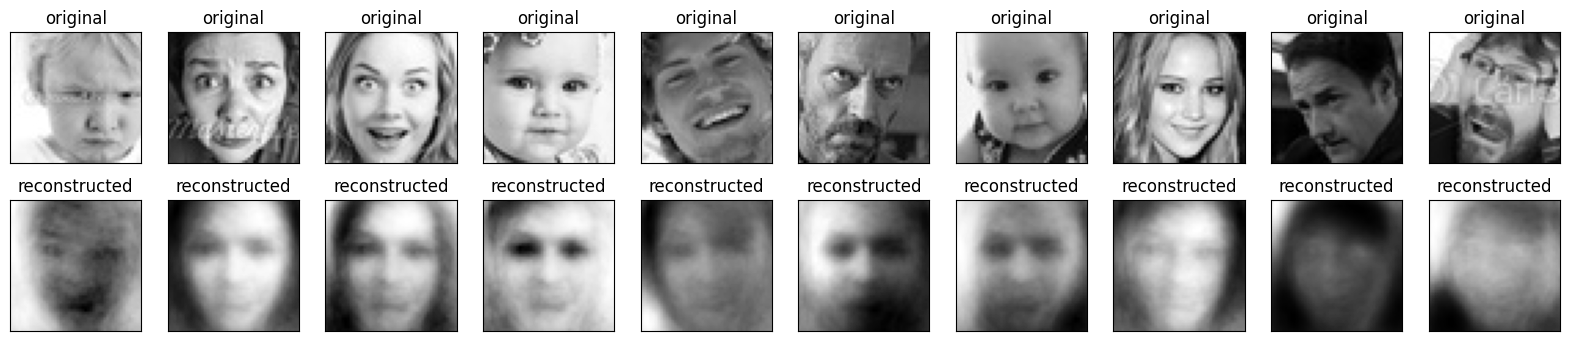

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_val_auto[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
x_train_auto.shape

(22972, 48, 48)

In [ ]:
decoded_imgs.shape

(5743, 48, 48)

## 2D Transition

In [ ]:
classifier = RandomForestClassifier(n_estimators = 100,random_state = 42)
classifier.fit(x_train_auto, y_train)
y_pred = classifier.predict(decoded_imgs)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)